# Description

현재 EPL, LaLiga, 세리에 A등 유럽 5대리그는 새로운 시즌에 도입하기 전 팀을 재 정비하기 위하여 선수들을 매각하거나 영입을 하고 있습니다.

이때, 선수를 매각하려는 구단 혹은 선수를 영입하려는 구단은 어떠한 기준으로 협상을 하고 이적을 확정 할까요

이는 영입하려는 구단이 시즌 중 구단 내 스카우터를 파견하여 선수의 능력치를 수집하고 이를 통하여 구단에 어느정도 가격을 측정하면 좋을지 보고를 하게 됩니다.

그렇다면 정말로 선수의 시장가격과 능력치 사이의 상관성이 있을까요?

이를 알아보기 위해 FIFA에서 제공하는 데이터를 바탕으로 선수들의 가치를 직접 확인해보시기 바랍니다. 

[파일]
1. FIFA_train.csv : 축구선수의 정보와 능력치 그리고 이적시장 가격이 포함된 데이터
2. FIFA_test.csv : 축구선수의 정보와 능력치가 포함된 데이터 해당 데이터의 선수들의 이적료를 예측해 주시면 됩니다.
3. submission.csv : 답안지의 형식

평가 지표 : RMSE

# Data Fields

1. id : 선수 고유의 아이디
2. name : 이름
3. age : 나이
4. continent : 선수들의 국적이 포함되어 있는 대륙입니다
5. contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다
6. position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
7. prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
8. reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
9. stat_overall : 선수의 현재 능력치 입니다.
10. stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.
11. stat_skill_moves : 선수의 개인기 능력치 입니다.
12. value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
fifa_df = pd.read_csv('./Fifa/FIFA_train.csv')

In [3]:
fifa_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [4]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


<br><br>

# EDA

## [age]
선수의 나이

### age의 분포

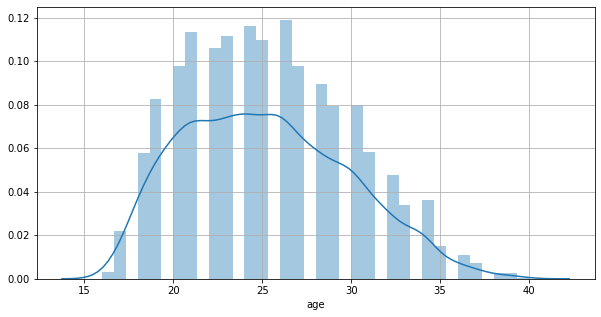

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['age'])
plt.grid(True)
plt.show()

### age와 value의 상관성

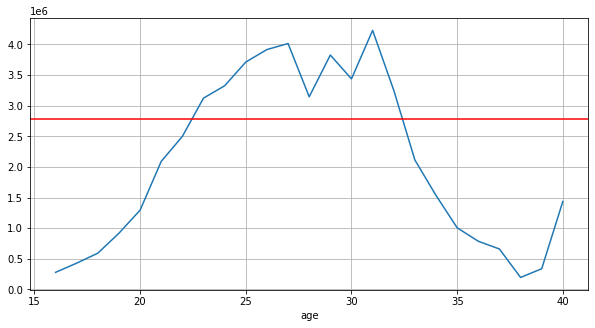

In [6]:
fifa_df.groupby('age').mean()['value'].plot(figsize=(10,5), grid=True)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

----------
*수평선은 평균 value값

- 10대에서 20대 중반까지 꾸준히 증가 
- 20대 초반~30대 초반은 평균 이상
- 20대 중반~30대 초반까지는 심한 변동
- 30대 초반~30대 후반까지는 하락세
- 40대에 상승(샘플이 적음)


## [continent]

선수들의 국적이 포함되어 있는 대륙입니다

### 선수들의 국적(대륙) 분포

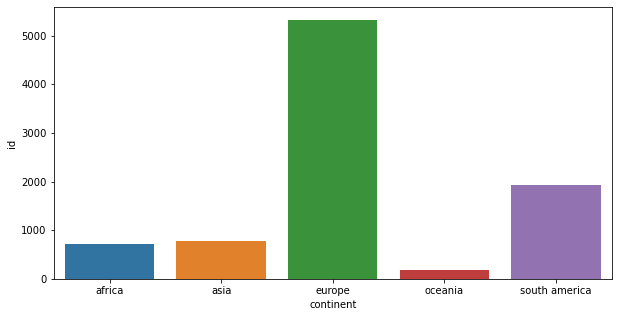

In [7]:
plt.figure(figsize=(10,5))
tmp = fifa_df.groupby('continent').count()
sns.barplot(x=tmp.index, y=tmp['id'])
plt.show()

### 각 대륙의 인구 대비 선수의 수

- 대륙의 인구 수 출처: 나무위키

In [8]:
total_eu = 7.4 #7억 4천
total_oc = 0.36 #3천 6백만
total_sa = 4.2 #4억 2천만
total_as = 27.0 #27억
total_af =12.0 #12억

In [9]:
tmp = tmp['id']
for e,i in enumerate([total_af, total_as, total_eu,total_oc, total_sa]):
    tmp.iloc[e] /= i

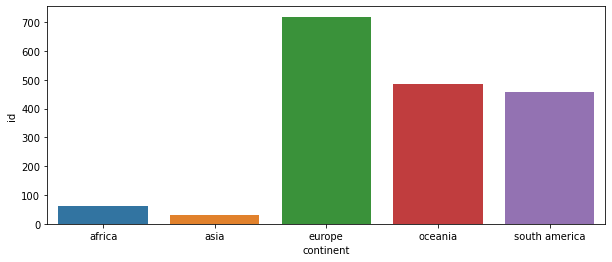

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(x=tmp.index, y=tmp)
plt.show()

------
- 인구 대비로 보아도 europe이 가장 많다.
- oceania는 단순히 선수의 수로만 보았을 땐 가장 적었으나, 인구 대비 2번째로 많다.

### continent와 value의 상관성

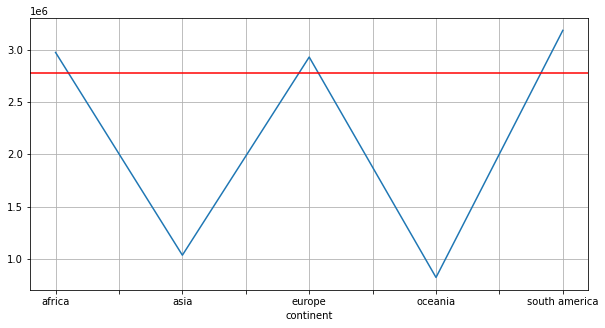

In [11]:
fifa_df.groupby('continent').mean()['value'].plot(figsize=(10,5),grid=True)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

------
*수평선은 평균 value값

- asia와 oceania 출신 선수들의 평균 value는 평균보다 한참 낮다.
- south america 출신 선수들의 평균이 가장 높다.


## [contract_until]

선수의 계약기간이 언제까지인지 나타내어 줍니다

In [12]:
fifa_df['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
Jan 12, 2019       1
May 31, 2020       1
2026               1
Name: contract_until, dtype: int64

-----
- 연도로 형식을 맞춰야겠다.

In [13]:
for ind in list(filter(lambda x: len(fifa_df.loc[x,'contract_until'])>4, fifa_df.index)):
    fifa_df.loc[ind,'contract_until'] = fifa_df.loc[ind,'contract_until'].split()[-1]

In [14]:
fifa_df['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

### contract_until의 분포

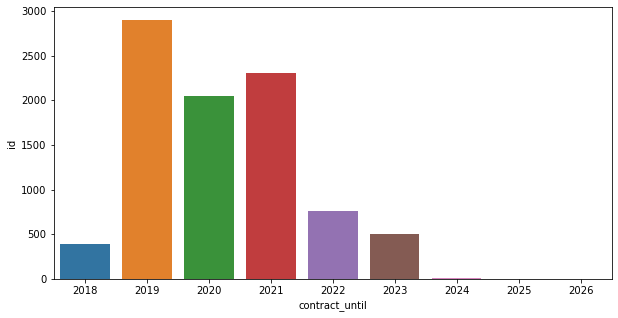

In [15]:
plt.figure(figsize=(10,5))
tmp = fifa_df.groupby('contract_until').count()['id']
sns.barplot(x= tmp.index, y=tmp)
plt.show()

### contract_until과 value의 상관성

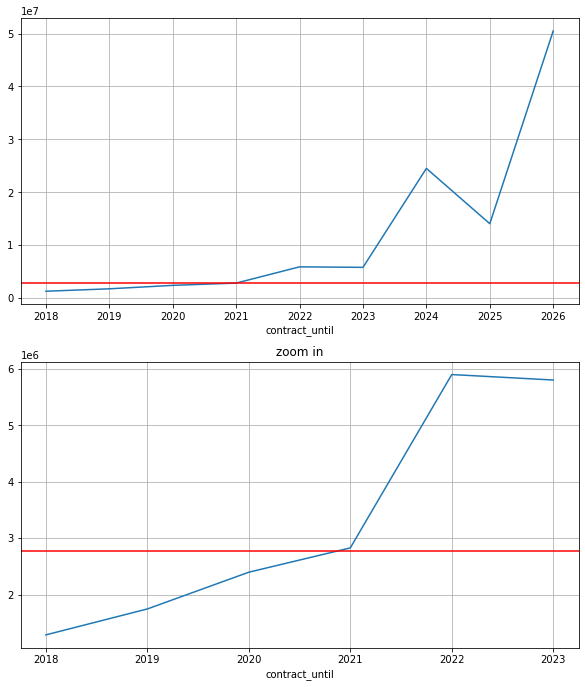

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
fifa_df.groupby('contract_until').mean()['value'].plot(grid=True)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.subplot(2,1,2)
plt.subplots_adjust(top=1)
plt.title('zoom in')
fifa_df.groupby('contract_until').mean()['value'][:-3].plot(grid=True)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

-----
- 2024~2025년에 계약이 해지되는 선수가 전반적으로 value가 높지만, 샘플이 별로 없어 신뢰도가 낮다.
- 2018~2022년까지 꾸준히 상승하고 있다가 2023년에 조금 하락했다.
- 2021년 이전에 계약이 해지되는 선수는 value가 전체 평균보다 낮다.

## [position]

선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등

### position 종류

In [17]:
fifa_df.position.unique()

array(['ST', 'GK', 'DF', 'MF'], dtype=object)

- ST: striker
- GK: goalkeeper
- DF: defender
- MF: midfielder

### position의 분포

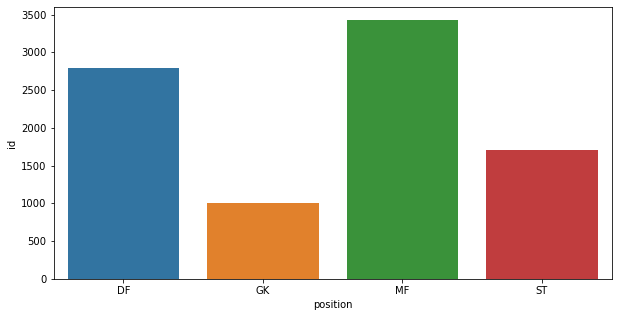

In [18]:
plt.figure(figsize=(10,5))
tmp = fifa_df.groupby('position').count()['id']
sns.barplot(x= tmp.index, y=tmp)
plt.show()

### position과 value의 상관성

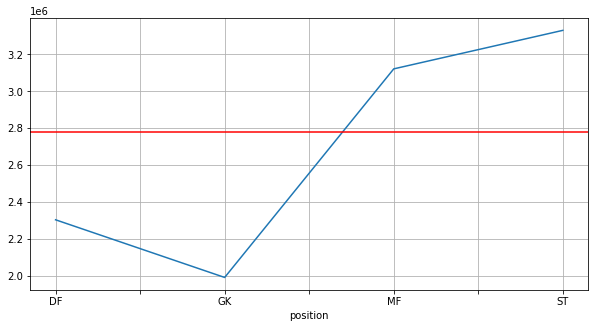

In [19]:
fifa_df.groupby('position').mean()['value'].plot(figsize=(10,5),grid=True)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

------
- 전체 position 중 striker가 가장 value가 높다.
- GK가 가장 value가 낮다.

## [prefer_foot]

선수가 선호하는 발입니다. ex) 오른발

### prefer_foot 분포

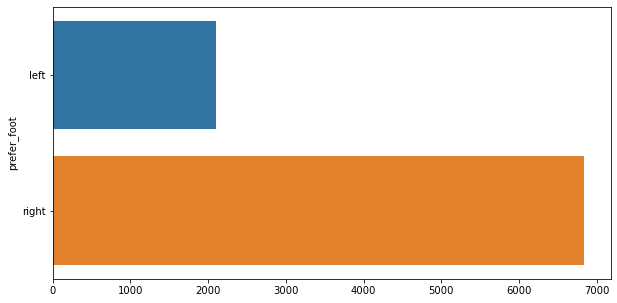

In [20]:
plt.figure(figsize=(10,5))
tmp = fifa_df.groupby('prefer_foot').count()['id']
sns.barplot(y=tmp.index, x=tmp)
plt.xlabel('')
plt.show()

-----
오른발잡이가 왼발잡이보다 3배 이상 많다.

### prefer_foot과 value의 상관성

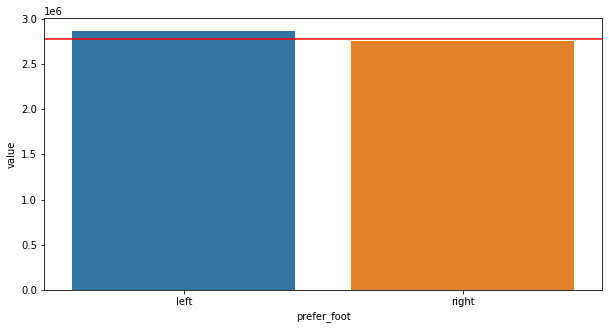

In [21]:
tmp = fifa_df.groupby('prefer_foot').mean()['value']
plt.figure(figsize=(10,5))
sns.barplot(x=tmp.index, y=tmp)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

------
- 왼발을 선호하는 선수가 value 평균이 더 높고, 전체 평균보다도 높다.
- 오른발을 선호하는 선수의 value평균은 전체 평균보다 낮다.

## [reputation]

선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수

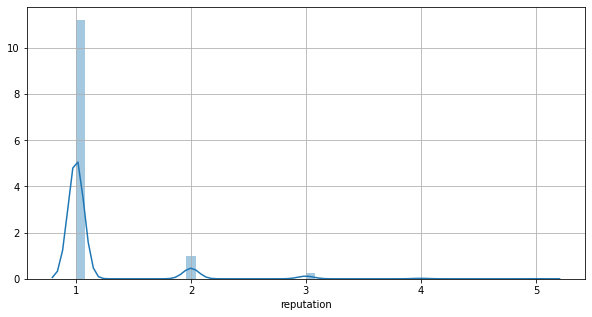

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['reputation'])
plt.grid(True)
plt.show()

In [23]:
fifa_df.groupby('reputation').count()

,id,name,age,continent,contract_until,position,prefer_foot,stat_overall,stat_potential,stat_skill_moves,value
reputation,,,,,,,,,,,
1.0,8014,8014,8014,8014,8014,8014,8014,8014,8014,8014,8014
2.0,706,706,706,706,706,706,706,706,706,706,706
3.0,177,177,177,177,177,177,177,177,177,177,177
4.0,31,31,31,31,31,31,31,31,31,31,31
5.0,4,4,4,4,4,4,4,4,4,4,4


-------
유명한 정도가 1.0에 너무 쏠려있다.

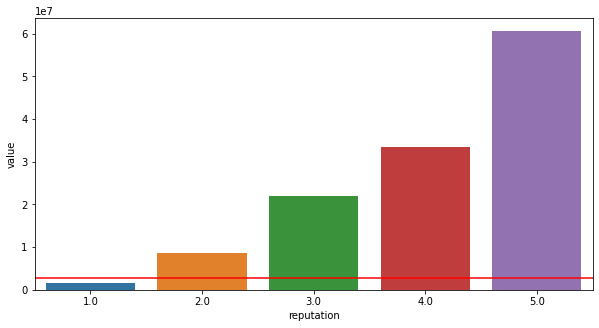

In [24]:
tmp = fifa_df.groupby('reputation').mean()['value']
plt.figure(figsize=(10,5))
sns.barplot(x=tmp.index, y=tmp)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

---------
- reputation 값이 높을 수록 value는 높아진다.
- 3.0부터 샘플이 많이 없지만, 이는 그만큼 3.0이상 도달하기 힘들다는 뜻으로 해석한다.

## [stat_overall]

선수의 현재 능력치 입니다

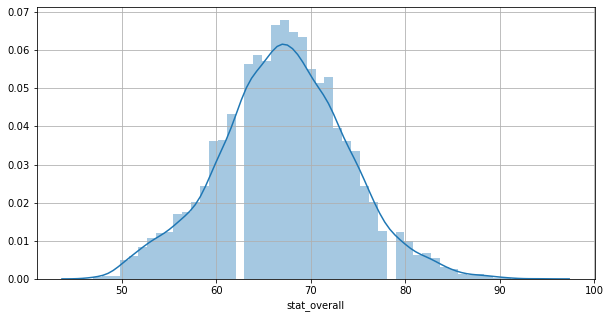

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['stat_overall'])
plt.grid(True)
plt.show()

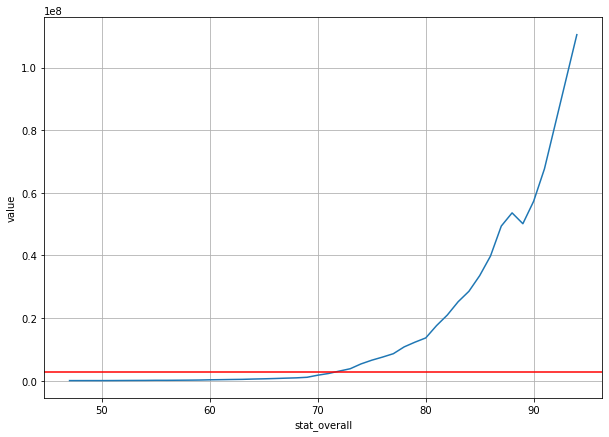

In [26]:
tmp = fifa_df.groupby('stat_overall').mean()['value']
plt.figure(figsize=(10,7))
sns.lineplot(x=tmp.index, y=tmp)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.grid(True)
plt.show()

## [stat_potential]

선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.

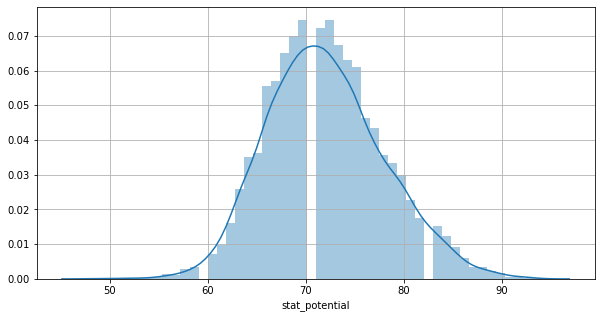

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['stat_potential'])
plt.grid(True)
plt.show()

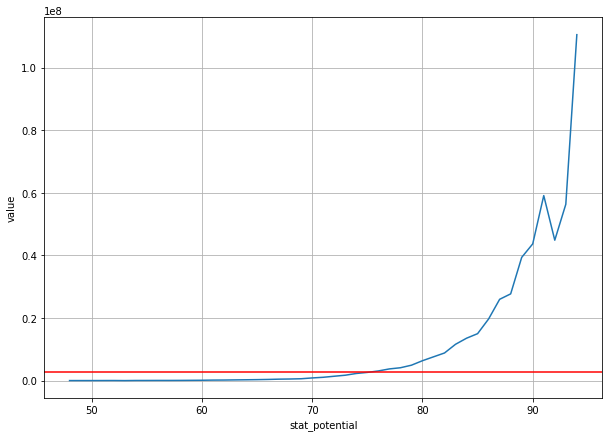

In [28]:
tmp = fifa_df.groupby('stat_potential').mean()['value']
plt.figure(figsize=(10,7))
sns.lineplot(x=tmp.index, y=tmp)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.grid(True)
plt.show()

### stat_potential과 stat_overall의 상관성

두 컬럼의 분포와 value와의 상관성이 비슷해보인다.

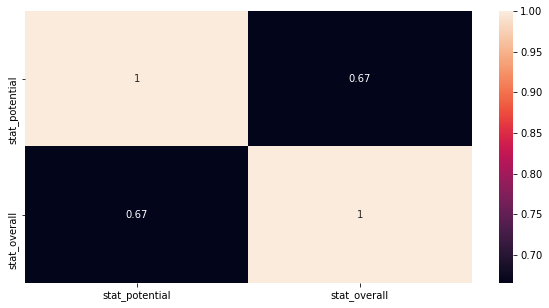

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(fifa_df[['stat_potential', 'stat_overall']].corr(),annot=True)
plt.show()

-----
- 상관 계수가 0.67로 강하진 않지만 어느정도 양의 관계를 갖고 있다고 볼 수 있다.

### age와 stat_potential & stat_overall 의 상관성

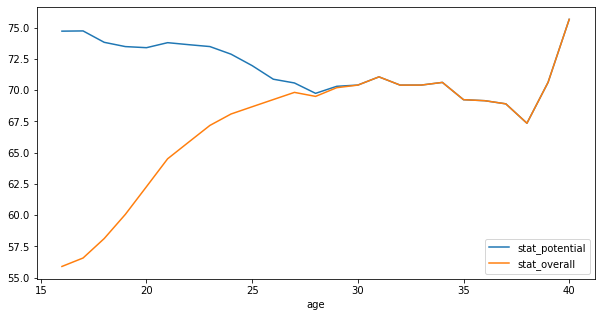

In [30]:
plt.figure(figsize=(10,5))
fifa_df.groupby('age').mean()['stat_potential'].plot()
fifa_df.groupby('age').mean()['stat_overall'].plot()
plt.legend()
plt.show()

-----
- age가 낮을 수록 stat_potential은 높고 stat_overall은 낮다. 
- age가 높을 수록 stat_overall은 높아지고 stat_potential은 낮아진다.
- 30대부터 정체

## [stat_skill_moves]

선수의 개인기 능력치 입니다.

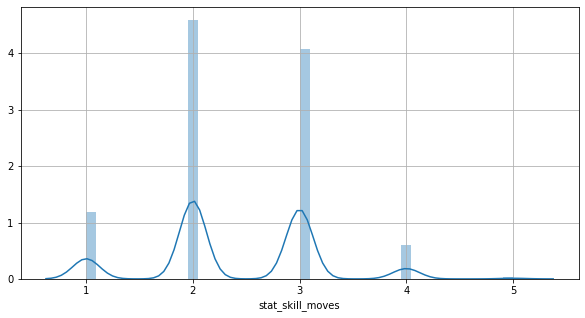

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['stat_skill_moves'])
plt.grid(True)
plt.show()

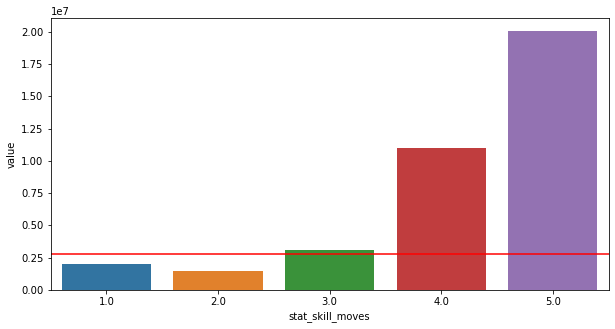

In [32]:
tmp = fifa_df.groupby('stat_skill_moves').mean()['value']
plt.figure(figsize=(10,5))
sns.barplot(x=tmp.index, y=tmp)
plt.axhline(y=fifa_df['value'].mean(), color='r')
plt.show()

## [value]

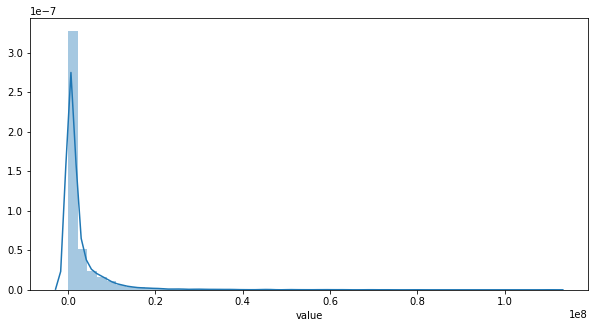

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(fifa_df['value'])
plt.show()

------
정규분포가 아니다.

In [34]:
fifa_df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


### 로그 변환

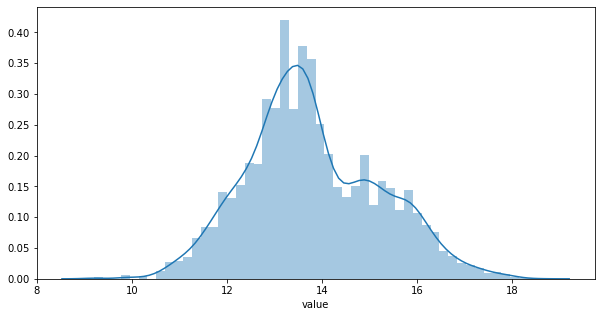

In [35]:
plt.figure(figsize=(10,5))
fifa_df['value'] = np.log1p(fifa_df['value'])
sns.distplot(fifa_df['value'])
plt.show()

# Data Preprocessing

In [36]:
feature_all = fifa_df.drop('value',axis=1).columns[2:]
feature_all

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

## Label encoder & Scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in feature_all:
    fifa_df[col] = label.fit_transform(fifa_df[col])

In [38]:
minmax = MinMaxScaler()
stand = StandardScaler()
stand_tmp = stand.fit_transform(fifa_df[feature_all])
minmax_tmp = minmax.fit_transform(fifa_df[feature_all])
#Scaler 결과 담을 DF
tmp = pd.DataFrame()

## 상관성이 높은 피처들 -> 차원 축소

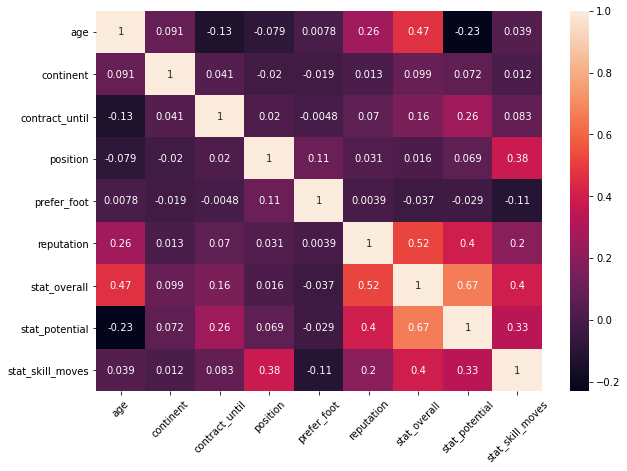

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(fifa_df[feature_all].corr(), annot=True)
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

### 표준화

In [40]:
for e in range(stand_tmp.shape[1]):
    tmp[feature_all[e]]= stand_tmp[:,e]

In [41]:
before_pca = fifa_df[feature_all].corr().mean()
before_pca.sort_values(ascending = False)

stat_overall        0.365527
stat_potential      0.281898
reputation          0.277623
stat_skill_moves    0.259844
position            0.169630
contract_until      0.165868
age                 0.158503
continent           0.143251
prefer_foot         0.102046
dtype: float64

### 여러 컬럼들과 상관성이 가장 높은 2개의 컬럼 -> pca

In [42]:
top_2 = fifa_df[feature_all].corr().mean().sort_values(ascending = False)[:2].index

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [44]:
pca_tmp= pca.fit_transform(tmp[top_2])

In [45]:
pca_tmp

array([[ 5.16891921],
       [ 4.94762352],
       [ 4.71137583],
       ...,
       [-3.0175292 ],
       [-2.89940535],
       [-3.13565305]])

### pca 변환 후 DF에 넣기 + top_2 컬럼 삭제

In [46]:
fifa_df['pca'] = pca_tmp
fifa_df.drop(top_2,axis=1, inplace=True)

In [47]:
fifa_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_skill_moves,value,pca
0,0,L. Messi,15,4,3,3,0,4,3,18.520526,5.168919
1,3,De Gea,11,2,2,1,1,3,0,18.092177,4.947624
2,7,L. Suárez,15,4,3,3,1,4,2,18.197537,4.711376
3,8,Sergio Ramos,16,2,2,0,1,3,2,17.747336,4.711376
4,9,J. Oblak,9,2,3,1,1,2,0,18.035018,4.844452
...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,2,0,1,2,1,0,2,11.002117,-3.032481
8928,16936,C. Ehlich,3,2,2,0,1,0,1,10.596660,-3.608148
8929,16941,N. Fuentes,2,4,3,0,1,0,1,10.819798,-3.017529
8930,16942,J. Milli,2,2,3,1,1,0,0,10.819798,-2.899405


In [48]:
feature_all = fifa_df.drop('value', axis=1).columns[2:]
feature_all

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_skill_moves', 'pca'],
      dtype='object')

### 차원 축소 후 컬럼들의 상관성

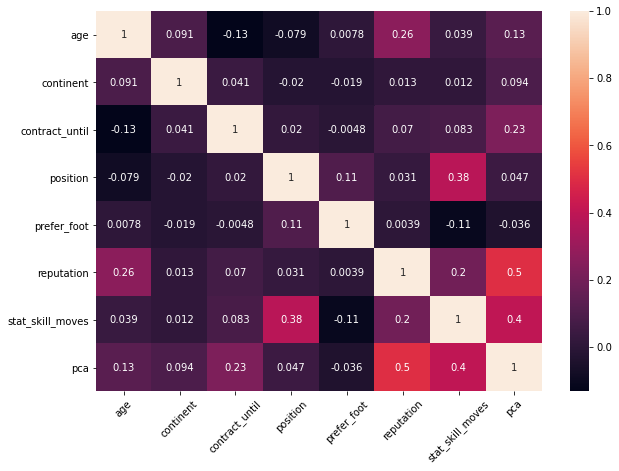

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(fifa_df[feature_all].corr(), annot=True)
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.show()

In [50]:
after_pca = fifa_df[feature_all].corr().mean()
after_pca.sort_values(ascending = False)

pca                 0.295956
reputation          0.260314
stat_skill_moves    0.250919
position            0.186029
age                 0.164975
contract_until      0.163119
continent           0.151454
prefer_foot         0.118505
dtype: float64

In [51]:
pd.concat([before_pca, after_pca],axis=1).transpose()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,pca
0,0.158503,0.143251,0.165868,0.169630,0.102046,0.277623,0.365527,0.281898,0.259844,NaN
1,0.164975,0.151454,0.163119,0.186029,0.118505,0.260314,NaN,NaN,0.250919,0.295956


In [52]:
#pca 이전의 모든 컬럼끼리의 상관계수 평균
before_pca.mean()

0.21379891572083531

In [53]:
#pca 후의 모든 컬럼끼리의 상관계수 평균
after_pca.mean()

0.19890870646387065

-----
전반적으로 컬럼끼리의 상관성이 낮아짐

## 샘플링
- reputation, stat_skill_moves 이 두 컬럼이 데이터의 불균형이 엄청 심하다.

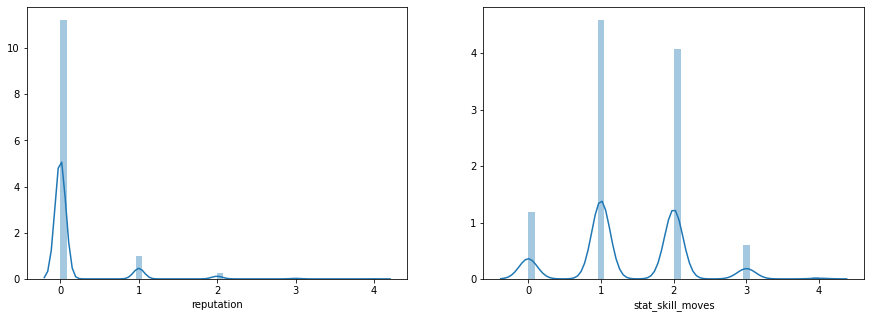

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(fifa_df['reputation'])
plt.subplot(1,2,2)
sns.distplot(fifa_df['stat_skill_moves'])
plt.show()

In [55]:
#category 타입으로 변환
sampling_f= ['reputation', 'stat_skill_moves']
fifa_df[sampling_f] =fifa_df[sampling_f].astype('category')
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                8932 non-null   int64   
 1   name              8932 non-null   object  
 2   age               8932 non-null   int64   
 3   continent         8932 non-null   int32   
 4   contract_until    8932 non-null   int32   
 5   position          8932 non-null   int32   
 6   prefer_foot       8932 non-null   int32   
 7   reputation        8932 non-null   category
 8   stat_skill_moves  8932 non-null   category
 9   value             8932 non-null   float64 
 10  pca               8932 non-null   float64 
dtypes: category(2), float64(2), int32(4), int64(2), object(1)
memory usage: 506.4+ KB


In [56]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
se =SMOTEENN(random_state=0)

### stat_skill_moves 리샘플링 : Smote+ENN

In [57]:
resi_col = fifa_df.drop('stat_skill_moves',axis=1).columns[2:]
X_ , y_ =se.fit_resample(np.array(fifa_df[resi_col]).reshape(-1,len(resi_col)),np.array(fifa_df['stat_skill_moves']).reshape(-1,1))

In [58]:
resamp_df = pd.DataFrame()
resamp_df[resi_col]= pd.DataFrame(X_)

In [59]:
resamp_df['stat_skill_moves'] = pd.DataFrame(y_)

In [60]:
resamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13820 entries, 0 to 13819
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               13820 non-null  float64
 1   continent         13820 non-null  float64
 2   contract_until    13820 non-null  float64
 3   position          13820 non-null  float64
 4   prefer_foot       13820 non-null  float64
 5   reputation        13820 non-null  float64
 6   value             13820 non-null  float64
 7   pca               13820 non-null  float64
 8   stat_skill_moves  13820 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 971.8 KB


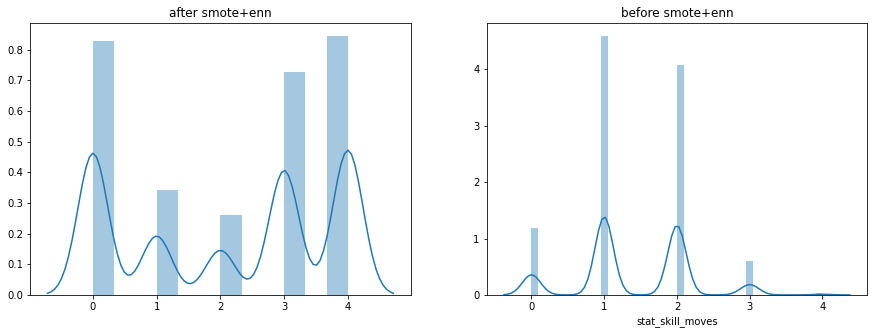

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("after smote+enn")
sns.distplot(pd.DataFrame(resamp_df['stat_skill_moves']))
plt.subplot(1,2,2)
plt.title("before smote+enn")
sns.distplot(fifa_df['stat_skill_moves'])
plt.show()

### reputation 리샘플링: undersampling (random)

In [62]:
resamp_df['reputation'] =resamp_df['reputation'].astype('int') #float -> int

In [63]:
target_df = resamp_df.loc[resamp_df['reputation'] == 0]
target_df

,age,continent,contract_until,position,prefer_foot,reputation,value,pca,stat_skill_moves
21,14.000000,4.000000,3.000000,1.000000,1.000000,0,16.454568,2.719715,0
27,7.000000,2.000000,1.000000,1.000000,1.000000,0,16.648724,3.089038,0
29,10.000000,2.000000,2.000000,1.000000,0.000000,0,16.380460,2.631495,0
30,13.000000,2.000000,3.000000,1.000000,1.000000,0,16.257858,2.395247,0
33,10.000000,4.000000,3.000000,1.000000,1.000000,0,16.012735,2.055828,0
...,...,...,...,...,...,...,...,...,...
13805,15.602027,3.204054,1.000000,2.602027,0.000000,0,15.450943,1.256472,4
13808,15.567925,3.135849,2.135849,2.000000,0.567925,0,14.561473,0.547676,4
13814,6.207497,2.000000,1.396251,2.603749,0.396251,0,14.787207,0.820761,4
13816,7.838003,1.161997,1.419001,2.580999,0.419001,0,15.080957,0.823391,4


In [64]:
resamp_df.shape

(13820, 9)

In [65]:
resamp_df.drop(np.random.randint(target_df.index[0],target_df.index[-1],len(target_df)//5),inplace=True)

In [66]:
resamp_df.shape

(12032, 9)

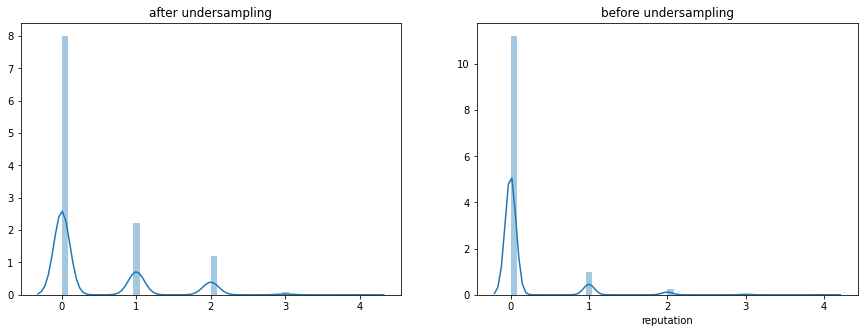

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("after undersampling")
sns.distplot(pd.DataFrame(resamp_df['reputation']))
plt.subplot(1,2,2)
plt.title("before undersampling")
sns.distplot(fifa_df['reputation'])
plt.show()

## 모두 PCA
- n_components = 4 -> 점수 낮음

In [107]:
feature_all

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_skill_moves', 'pca'],
      dtype='object')

In [68]:
pca = PCA(n_components=len(feature_all)//2)

In [69]:
pca_df = pd.DataFrame()
pca_df = pca.fit_transform(stand.fit_transform(fifa_df[feature_all]))

In [70]:
pca_df.shape

(8932, 4)

## category 타입 -> one-hot encoding

In [135]:
feature_all

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_skill_moves', 'pca'],
      dtype='object')

### 대상 피처 추출

In [139]:
target_feat = list(filter(lambda x: fifa_df[x].nunique ()<=5,feature_all))

In [140]:
target_feat

['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']

In [193]:
fifa_df[target_feat] = fifa_df[target_feat].astype('category')

In [194]:
tmp = pd.get_dummies(fifa_df[target_feat])

In [195]:
fifa_df_oh = pd.concat([fifa_df.drop(target_feat,axis=1), tmp],axis=1)

In [196]:
fifa_df_oh

,id,name,age,contract_until,value,pca,continent_0,continent_1,continent_2,continent_3,...,reputation_0,reputation_1,reputation_2,reputation_3,reputation_4,stat_skill_moves_0,stat_skill_moves_1,stat_skill_moves_2,stat_skill_moves_3,stat_skill_moves_4
0,0,L. Messi,15,3,18.520526,5.168919,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,De Gea,11,2,18.092177,4.947624,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,7,L. Suárez,15,3,18.197537,4.711376,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8,Sergio Ramos,16,2,17.747336,4.711376,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,9,J. Oblak,9,3,18.035018,4.844452,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,2,1,11.002117,-3.032481,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8928,16936,C. Ehlich,3,2,10.596660,-3.608148,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
8929,16941,N. Fuentes,2,3,10.819798,-3.017529,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8930,16942,J. Milli,2,3,10.819798,-2.899405,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


<br><br>

# Modeling & Evaluation

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from lightgbm import LGBMRegressor

def get_reg_eval(model_name, params=None, X_data_n=None, y_target_n = None, verbose=True):

    if verbose: print(f"-------{model_name}------")
    if model_name == 'LGBM':
        model = LGBMRegressor()
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
    elif model_name =='RF':
        model = RandomForestRegressor()
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')
    else:
        for param in params:
            if model_name == "Ridge": model = Ridge(alpha= param)
            elif model_name=="Lasso": model = Lasso(alpha=param)
            elif model_name=='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7) #alpha = a+b값, l1_ratio=a/(a+b)

            neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
            avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
            print(f'alpha: {param}, 5 folds 세트의 평균 RMSE: {np.round(avg_rmse,3)}')

In [197]:
one_all = fifa_df_oh.drop(['value'],axis=1).columns[2:]
one_all

Index(['age', 'contract_until', 'pca', 'continent_0', 'continent_1',
       'continent_2', 'continent_3', 'continent_4', 'position_0', 'position_1',
       'position_2', 'position_3', 'prefer_foot_0', 'prefer_foot_1',
       'reputation_0', 'reputation_1', 'reputation_2', 'reputation_3',
       'reputation_4', 'stat_skill_moves_0', 'stat_skill_moves_1',
       'stat_skill_moves_2', 'stat_skill_moves_3', 'stat_skill_moves_4'],
      dtype='object')

In [198]:
models = ['Ridge', 'Lasso', 'ElasticNet','LGBM','RF']
X_train, X_test, y_train, y_test = train_test_split(fifa_df_oh[one_all],fifa_df['value'],test_size=0.3, random_state=0)

In [199]:
params=[0.1,1,5,10,100,200,500]
for m in models:
    if m in ['LGBM','RF']:
        get_reg_eval(m,None,X_train, y_train)
    else:
        get_reg_eval(m, params, X_train, y_train)

-------Ridge------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 0.402
alpha: 1, 5 folds 세트의 평균 RMSE: 0.402
alpha: 5, 5 folds 세트의 평균 RMSE: 0.402
alpha: 10, 5 folds 세트의 평균 RMSE: 0.402
alpha: 100, 5 folds 세트의 평균 RMSE: 0.403
alpha: 200, 5 folds 세트의 평균 RMSE: 0.405
alpha: 500, 5 folds 세트의 평균 RMSE: 0.412
-------Lasso------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 0.439
alpha: 1, 5 folds 세트의 평균 RMSE: 0.889
alpha: 5, 5 folds 세트의 평균 RMSE: 1.411
alpha: 10, 5 folds 세트의 평균 RMSE: 1.411
alpha: 100, 5 folds 세트의 평균 RMSE: 1.411
alpha: 200, 5 folds 세트의 평균 RMSE: 1.411
alpha: 500, 5 folds 세트의 평균 RMSE: 1.411
-------ElasticNet------
alpha: 0.1, 5 folds 세트의 평균 RMSE: 0.439
alpha: 1, 5 folds 세트의 평균 RMSE: 0.794
alpha: 5, 5 folds 세트의 평균 RMSE: 1.411
alpha: 10, 5 folds 세트의 평균 RMSE: 1.411
alpha: 100, 5 folds 세트의 평균 RMSE: 1.411
alpha: 200, 5 folds 세트의 평균 RMSE: 1.411
alpha: 500, 5 folds 세트의 평균 RMSE: 1.411
-------LGBM------
5 folds 세트의 평균 RMSE: 0.147
-------RF------
5 folds 세트의 평균 RMSE: 0.142


In [201]:
lgbm = LGBMRegressor()
lgbm.fit(fifa_df_oh[one_all], fifa_df['value'])

LGBMRegressor()

In [202]:
rf = RandomForestRegressor()
rf.fit(fifa_df_oh[one_all], fifa_df['value'])

RandomForestRegressor()

In [203]:
rid = Ridge(alpha=0.1)
rid.fit(fifa_df_oh[one_all], fifa_df['value'])

Ridge(alpha=0.1)

<br><br>

# Submission

### train과 똑같이 전처리

In [80]:
def preprocessing(target):
    pca1 = PCA(n_components=1)
    #1. contract_unit 형식 맞추기
    for ind in list(filter(lambda x: len(target.loc[x,'contract_until'])>4, target.index)):
        target.loc[ind,'contract_until'] = target.loc[ind,'contract_until'].split()[-1]
        
    #2. LabelEncoding
    label = LabelEncoder()
    for col in target.columns[2:]:
        target[col] = label.fit_transform(target[col])

    #3. stat_overall, stat_potential -> pca 수행 후 두 컬럼은 삭제
    target['pca'] = pca1.fit_transform(stand.fit_transform(target[top_2]))
    target.drop(top_2, axis=1, inplace=True)
    return target

In [95]:
def preprocessing_pca(target):
    pca4 = PCA(n_components=len(feature_all)//2)
    target = pca4.fit_transform(stand.fit_transform(target[feature_all]))
    return target

In [200]:
def preprocessing_one_hot(target):
    target[target_feat] = target[target_feat].astype('category')
    tmp_target = pd.get_dummies(target[target_feat])
    target_ = pd.concat([target.drop(target_feat,axis=1), tmp_target],axis=1)
    return target_

In [204]:
test = pd.read_csv('./Fifa/FIFA_test.csv')
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [205]:
test_ = preprocessing(test)

In [206]:
test_ = preprocessing_one_hot(test_)

In [207]:
test_

,id,name,age,contract_until,pca,continent_0,continent_1,continent_2,continent_3,continent_4,...,reputation_0,reputation_1,reputation_2,reputation_3,reputation_4,stat_skill_moves_0,stat_skill_moves_1,stat_skill_moves_2,stat_skill_moves_3,stat_skill_moves_4
0,1,Cristiano Ronaldo,17,4,5.152188,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,Neymar Jr,10,4,4.934478,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,4,K. De Bruyne,11,5,4.716767,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,5,E. Hazard,11,2,4.601434,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,6,L. Modrić,16,2,4.601434,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,4,3,-3.030105,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3824,16929,L. Wahlstedt,2,0,-2.799438,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3825,16932,Y. Góez,2,3,-2.799438,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3826,16937,A. Kaltner,2,2,-3.363150,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [209]:
#로그 변환된 y -> expm1으로 스케일 변환
#sub = np.expm1(rid.predict(test_[feature_all])) 
sub = np.expm1(rf.predict(test_[one_all])) 

<AxesSubplot:>

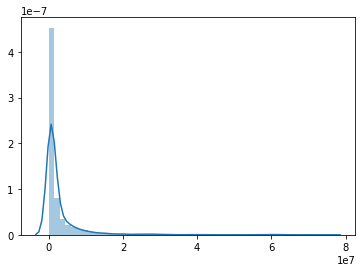

In [210]:
sns.distplot(sub)

In [211]:
submission = pd.read_csv('./Fifa/submission.csv')

In [212]:
submission['value'] = sub
submission

,id,value
0,1,6.070275e+07
1,2,7.503376e+07
2,4,6.326825e+07
3,5,6.547677e+07
4,6,5.765412e+07
...,...,...
3823,16924,5.998050e+04
3824,16929,5.074287e+04
3825,16932,6.051149e+04
3826,16937,5.056127e+04


In [213]:
# submission.to_csv('./Fifa/submission10.csv',index=False)

### 제출 결과 기록

In [105]:
results = pd.read_csv('./Fifa/results.csv')

In [106]:
results

,model,preprocessing_steps,result
0,LGBM,2,1898211.99
1,LGBM,3,1545629.54
2,RF,3,1514485.74
3,"RF(resamp),stat_skill만 smoteenn",3,1637743.34
4,"lgbm(resamp),stat_skill:smoteenn+reput:random(...",3,1577571.56
5,"RF(resamp),stat_skill:smoteenn+reput:random(cl...",3,1663520.51
6,"Ridge(resamp),stat_skill:smoteenn+reput:random...",3,2609684.70
7,모든 결과 mean(),3,1398775.79


In [130]:
# dic = {c:data for c,data in zip(results.columns, ['rf(all pca)', '4', np.round(3721113.3379745902,2)])}
# results= results.append(dic,ignore_index=True)


In [131]:
results

,model,preprocessing_steps,result
0,LGBM,2,1898211.99
1,LGBM,3,1545629.54
2,RF,3,1514485.74
3,"RF(resamp),stat_skill만 smoteenn",3,1637743.34
4,"lgbm(resamp),stat_skill:smoteenn+reput:random(...",3,1577571.56
5,"RF(resamp),stat_skill:smoteenn+reput:random(cl...",3,1663520.51
6,"Ridge(resamp),stat_skill:smoteenn+reput:random...",3,2609684.70
7,모든 결과 mean(),3,1398775.79
8,lgbm(all pca),4,3870976.20
9,rf(all pca),4,3721113.34


In [132]:
results.to_csv('./Fifa/results.csv', index=False)

## Ensemble

In [133]:
submissions=pd.DataFrame()

In [109]:
# for i in range(1,8):
#     if i==4: continue
#     submissions = pd.concat([submissions, pd.read_csv(f'./Fifa/submission{i}.csv')])

In [110]:
submissions=submissions.reset_index(drop=True)

,id,value
0,1,4.548455e+07
1,2,7.586964e+07
2,4,6.383868e+07
3,5,5.895862e+07
4,6,4.643637e+07
...,...,...
22963,16924,4.616722e+04
22964,16929,4.443156e+04
22965,16932,5.085278e+04
22966,16937,3.230758e+04


In [111]:
submissions.groupby('id').mean()

,value
id,
1,7.554684e+07
2,8.233821e+07
4,7.235778e+07
5,7.158001e+07
6,6.382576e+07
...,...
16924,5.667010e+04
16929,4.792325e+04
16932,5.808677e+04


In [112]:
# submissions.groupby('id').mean().to_csv('./Fifa/submission?.csv')